In [1]:
%%time
%matplotlib inline

import pandas as pd
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

CPU times: user 618 ms, sys: 166 ms, total: 784 ms
Wall time: 1.07 s


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%%time
df = pd.read_csv('/Users/christopherpan 1/Desktop/All_Data/Train_Test_Set2/train_2_600_rnd2.csv',sep="|")

<string>:2: DtypeWarning: Columns (1,161653) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4min 8s, sys: 17.3 s, total: 4min 25s
Wall time: 4min 37s


In [3]:
%%time
df.shape

CPU times: user 31 µs, sys: 11 µs, total: 42 µs
Wall time: 55.1 µs


(600, 161658)

In [4]:
df = df.drop(df.columns[0], axis = 1) 

In [5]:
keep = []
with open('/Users/christopherpan 1/Desktop/Topic Modeling Project Part 2/CUIUniverse_0.1.txt','r') as f:
    point1CUIs = f.readlines()
    for line in point1CUIs:
        a = line.split(',')
        keep.append(a[0])
keep.append('file_name_intagged')
keep.append('CUI')
keep.append('Max_Tag')

In [6]:
titles = df.columns.values
realKeep = []
for i in range(len(keep)):
    if keep[i] in titles:
        realKeep.append(keep[i])
    i += 1

In [7]:
df = df[realKeep]

In [8]:
print(len(df.columns))

20619


In [9]:
%%time
df['Max_Tag'].describe()

CPU times: user 7.2 ms, sys: 2.44 ms, total: 9.64 ms
Wall time: 8.99 ms


count    600.000000
mean       0.241159
std        0.152407
min       -0.024018
25%        0.145274
50%        0.217084
75%        0.315624
max        1.000000
Name: Max_Tag, dtype: float64

CPU times: user 191 ms, sys: 16.3 ms, total: 208 ms
Wall time: 228 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a7559f048>]],
      dtype=object)

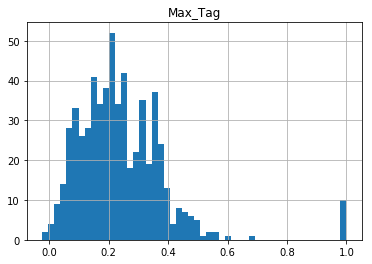

In [10]:
%%time
df.hist(column='Max_Tag', bins=50)

In [11]:
%%time
df.isnull().values.any()

CPU times: user 36.5 ms, sys: 14.6 ms, total: 51.1 ms
Wall time: 36.3 ms


False

In [12]:
%%time
print('y <= 0.00       : ',len(df[(df['Max_Tag']<=0)]), 100*len(df[(df['Max_Tag']<=0)])/17248.0)
print('0.00 < y <= 0.05: ',len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)]), 100*len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)])//600.0)
print('0.05 < y <= 0.10: ',len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)]), 100*len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)])/600.0)
print('0.10 < y <= 0.20: ',len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)]), 100*len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)])/600.0)
print('0.20 < y <= 0.30: ',len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)]), 100*len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)])/600.0)
print('0.30 < y <= 0.40: ',len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)]), 100*len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)])/600.0)
print('0.40 < y <= 0.50: ',len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)]), 100*len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)])/600.0)
print('0.50 < y <= 0.60: ',len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)]), 100*len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)])/600.0)
print('0.60 < y <= 0.70: ',len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)]), 100*len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)])/600.0)
print('0.70 < y <= 0.80: ',len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)]), 100*len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)])/600.0)
print('0.80 < y <= 0.90: ',len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)]), 100*len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)])/600.0)
print('0.90 < y <= 1.00: ',len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)]), 100*len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)])/600.0)
print('1.00 < y <= 1.10: ',len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)]), 100*len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)])/600.0)

y <= 0.00       :  2 0.011595547309833023
0.00 < y <= 0.05:  20 3.0
0.05 < y <= 0.10:  69 11.5
0.10 < y <= 0.20:  156 26.0
0.20 < y <= 0.30:  171 28.5
0.30 < y <= 0.40:  131 21.833333333333332
0.40 < y <= 0.50:  31 5.166666666666667
0.50 < y <= 0.60:  9 1.5
0.60 < y <= 0.70:  1 0.16666666666666666
0.70 < y <= 0.80:  0 0.0
0.80 < y <= 0.90:  0 0.0
0.90 < y <= 1.00:  10 1.6666666666666667
1.00 < y <= 1.10:  0 0.0
CPU times: user 293 ms, sys: 39.9 ms, total: 333 ms
Wall time: 176 ms


In [13]:
df['Bin_tag'] = (df['Max_Tag'] > 0.3)
df['Bin_tag'].astype(object).replace({False:'0',True:'1'})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
570    0
571    0
572    0
573    1
574    0
575    1
576    0
577    0
578    0
579    0
580    0
581    1
582    0
583    0
584    0
585    0
586    0
587    0
588    0
589    0
590    1
591    0
592    0
593    0
594    0
595    0
596    0
597    1
598    0
599    0
Name: Bin_tag, Length: 600, dtype: object

In [14]:
clean_frame_train = df.drop(['file_name_intagged', 'CUI', 'Max_Tag'], axis=1, inplace=False)

In [15]:
from sklearn.model_selection import train_test_split

y = clean_frame_train.Bin_tag
#X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train_2, y, stratify = true, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train, y, test_size=0.20)

X_tr = X_train.drop(['Bin_tag'], axis=1)
X_vl = X_valid.drop(['Bin_tag'], axis=1)

X_tr = X_tr.drop(X_tr.columns[0], axis = 1).as_matrix()
X_vl = X_vl.drop(X_vl.columns[0], axis = 1).as_matrix()

y_tr = y_train.astype(object).replace({False:'0',True:'1'}).as_matrix()
y_vl = y_valid.astype(object).replace({False:'0',True:'1'}).as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [16]:
print(X_tr)
print(X_vl)
print(y_tr)
print(y_vl)

[[0 0 0 ... 1 2 2]
 [0 0 0 ... 9 9 9]
 [0 0 0 ... 8 8 9]
 ...
 [0 0 0 ... 6 6 6]
 [0 0 0 ... 9 9 9]
 [0 0 0 ... 5 5 6]]
[[0 0 0 ... 9 9 9]
 [0 0 0 ... 9 9 9]
 [0 0 0 ... 3 3 3]
 ...
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 4 4 5]
 [0 0 0 ... 9 9 9]]
['0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '1' '0' '1' '1' '1'
 '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1'
 '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '1' '0' '

In [18]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
for c in C_param_range:
    regr.set_params(penalty ='l1',C = c)
    regr.fit(X_tr,y_tr)
    print(regr.predict(X_vl))
    score = regr.score(X_vl, y_vl)
    print(score)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.6833333333333333
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.683